In [ ]:
from google.colab import files
from google.colab import drive
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

# path to zip file containing the dataset in Google Drive
!cp '/content/drive/My Drive/Database.zip' .

# extract the Database folder to the current directory
!unzip Database.zip -d ./

Mounted at /content/drive
Archive:  Database.zip
   creating: ./Database/
  inflating: ./__MACOSX/._Database   
  inflating: ./Database/Label.txt    
  inflating: ./__MACOSX/Database/._Label.txt  
  inflating: ./Database/.DS_Store    
  inflating: ./__MACOSX/Database/._.DS_Store  
   creating: ./Database/Image/
  inflating: ./__MACOSX/Database/._Image  
  inflating: ./Database/Image/6_P0_R30_00054.jpg  
  inflating: ./__MACOSX/Database/Image/._6_P0_R30_00054.jpg  
  inflating: ./Database/Image/6_P10_R20_00027.jpg  
  inflating: ./__MACOSX/Database/Image/._6_P10_R20_00027.jpg  
  inflating: ./Database/Image/6_P10_R20_00033.jpg  
  inflating: ./__MACOSX/Database/Image/._6_P10_R20_00033.jpg  
  inflating: ./Database/Image/6_P0_R30_00040.jpg  
  inflating: ./__MACOSX/Database/Image/._6_P0_R30_00040.jpg  
  inflating: ./Database/Image/6_P20_R50_00022.jpg  
  inflating: ./__MACOSX/Database/Image/._6_P20_R50_00022.jpg  
  inflating: ./Database/Image/6_P50_R60_00007.jpg  
  inflating: ./__MACO

In [ ]:
label_path = '/content/Database/Label.txt'
image_folder = '/content/Database/Image'

# map the images with the label.txt
labels = pd.read_csv(label_path,
                     delimiter=' ',
                     header=None,
                     names=['Image', 'Pitch', 'Roll', 'Depth'])

print("First and last few rows of the labels:")
print(labels.head())
print(labels.tail())

First and last few rows of the labels:
               Image  Pitch  Roll     Depth
0  6_P0_R0_00001.jpg      0     0  0.611818
1  6_P0_R0_00002.jpg      0     0  0.693017
2  6_P0_R0_00003.jpg      0     0  0.457814
3  6_P0_R0_00004.jpg      0     0  0.105780
4  6_P0_R0_00005.jpg      0     0  0.296676
                    Image  Pitch  Roll     Depth
2011  6_P70_R70_00052.jpg     70    70  0.003353
2012  6_P70_R70_00053.jpg     70    70  0.958107
2013  6_P70_R70_00054.jpg     70    70  0.016327
2014  6_P70_R70_00055.jpg     70    70  0.000000
2015  6_P70_R70_00056.jpg     70    70  0.214759


In [ ]:
images = {}

# Loop through image filenames in Label.txt and load them
for img_name in labels['Image']:
    img_path = os.path.join(image_folder, img_name)
    try:
        images[img_name] = Image.open(img_path)  # Open the image
    except FileNotFoundError:
        print(f"Warning: {img_name} not found in {image_folder}")

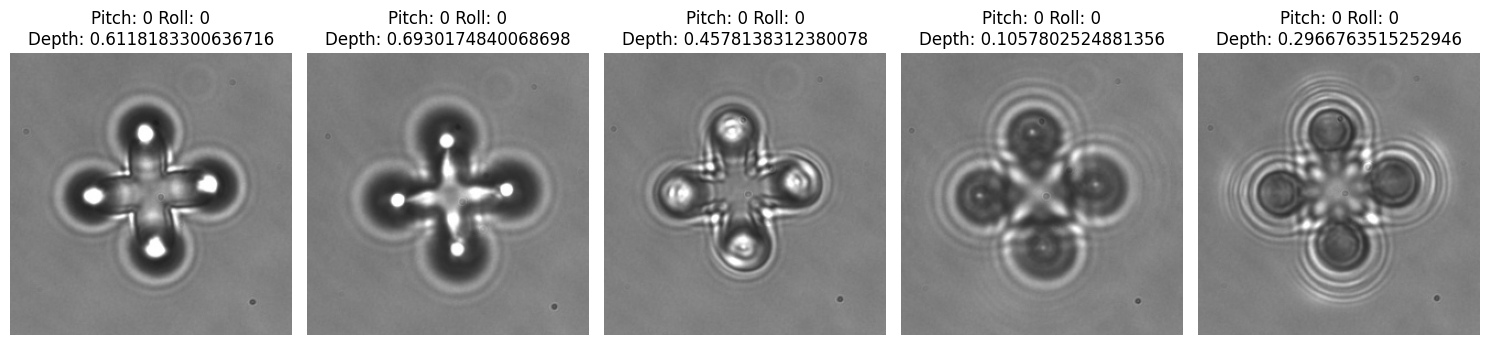

In [ ]:
# Displaying few sample images with their labels
plt.figure(figsize=(15, 5))

for i in range(5):
    sample_image_path = labels['Image'].iloc[i]
    sample_pitch = labels['Pitch'].iloc[i]
    sample_roll = labels['Roll'].iloc[i]
    sample_depth = labels['Depth'].iloc[i]

    sample_image_path = os.path.join(image_folder, sample_image_path)

    image = Image.open(sample_image_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Pitch: {sample_pitch} Roll: {sample_roll}\nDepth: {sample_depth}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# combining the pitch and roll class into a single pose class
labels['Pose_Class'] = labels['Pitch'].astype(str) + '_' + labels['Roll'].astype(str)

#label encoding the combined class
label_encoder = LabelEncoder()
labels['Pose_Class_Label'] = label_encoder.fit_transform(labels['Pose_Class'])

Pose_Class
0_0      56
0_10     56
0_20     56
0_30     56
0_40     56
0_50     56
0_60     56
0_70     56
10_10    56
10_20    56
10_30    56
10_40    56
10_50    56
10_60    56
10_70    56
20_20    56
20_30    56
20_40    56
20_50    56
20_60    56
20_70    56
30_30    56
30_40    56
30_50    56
30_60    56
30_70    56
40_40    56
40_50    56
40_60    56
40_70    56
50_50    56
50_60    56
50_70    56
60_60    56
60_70    56
70_70    56
Name: count, dtype: int64


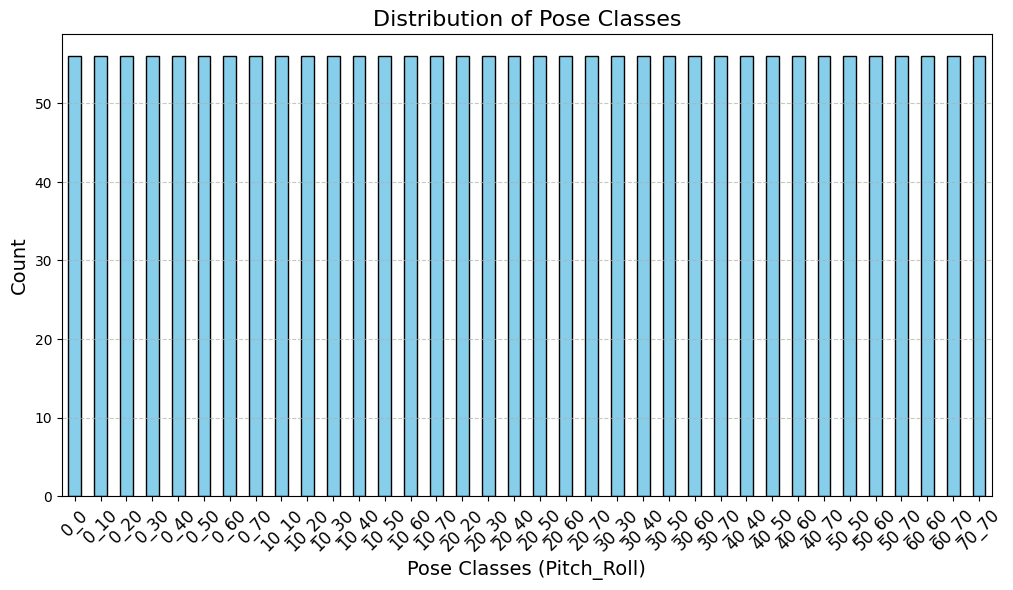

In [ ]:
class_counts = labels['Pose_Class'].value_counts()
print(class_counts)

# Bar Plot
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Pose Classes', fontsize=16)
plt.xlabel('Pose Classes (Pitch_Roll)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print(labels.head())
print(labels.tail())

               Image  Pitch  Roll     Depth Pose_Class  Pose_Class_Label
0  6_P0_R0_00001.jpg      0     0  0.611818        0_0                 0
1  6_P0_R0_00002.jpg      0     0  0.693017        0_0                 0
2  6_P0_R0_00003.jpg      0     0  0.457814        0_0                 0
3  6_P0_R0_00004.jpg      0     0  0.105780        0_0                 0
4  6_P0_R0_00005.jpg      0     0  0.296676        0_0                 0
                    Image  Pitch  Roll     Depth Pose_Class  Pose_Class_Label
2011  6_P70_R70_00052.jpg     70    70  0.003353      70_70                35
2012  6_P70_R70_00053.jpg     70    70  0.958107      70_70                35
2013  6_P70_R70_00054.jpg     70    70  0.016327      70_70                35
2014  6_P70_R70_00055.jpg     70    70  0.000000      70_70                35
2015  6_P70_R70_00056.jpg     70    70  0.214759      70_70                35


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import seaborn as sns
import torch.nn.functional as F

In [ ]:
# creating a dataset of the pose classes

class PoseDataset(Dataset):
    def __init__(self, labels, transform=None):

        self.labels_df = labels  # Store the original dataframe
        self.transform = transform
        self.image_folder = image_folder # Assign image_folder to self

    def __len__(self):
        return len(self.labels_df)  # Use the original dataframe for length

    def __getitem__(self, idx):
        img_path = self.labels_df.iloc[idx]['Image']  # Use labels_df here
        img_path = os.path.join(self.image_folder, img_path)  # Construct full path using img_path, not img_name
        label = self.labels_df.iloc[idx]['Pose_Class_Label']  # Use labels_df here

        image = Image.open(img_path).convert("L")  # grayscale

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
# SPLITTING the data into 60:20:20

train_df, test_df = train_test_split(labels,
                                     test_size=0.2,
                                     random_state=42,
                                     stratify=labels['Pose_Class_Label'])

train_df, val_df = train_test_split(train_df,
                                    test_size=0.25,
                                    random_state=42,
                                    stratify=train_df['Pose_Class_Label'])

print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Test samples: {len(test_df)}")

Training samples: 1209
Validation samples: 403
Test samples: 404


In [ ]:
# AUGMENTATION

train_transform = transforms.Compose([
    transforms.RandomRotation(2),       # Random rotation
    transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.5),  # Blurring effect
    transforms.RandomAffine(degrees=0, scale=(0.8, 1.2)),         # Random zoom (80%-120% scaling)
    transforms.ColorJitter(brightness=0.3),
    transforms.ToTensor(),               # Convert image to tensor
    transforms.Normalize((0.5,), (0.5,)) # Normalize to mean=0.5, std=0.5
])

val_test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [ ]:
# datasets creation
train_dataset = PoseDataset(train_df, transform=train_transform)
val_dataset = PoseDataset(val_df, transform=val_test_transform)
test_dataset = PoseDataset(test_df, transform=val_test_transform)

# dataloaders creation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
for images, labels in train_loader:
    print("Image shape:", images.shape)
    print("Label shape:", labels.shape)
    break

Image shape: torch.Size([32, 1, 256, 256])
Label shape: torch.Size([32])


In [ ]:
class CombinedClassCNN(nn.Module):
    def __init__(self, num_classes=36):  # Combined class with 36 classes
        super(CombinedClassCNN, self).__init__()

        # Shared Convolutional Layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # Input: (C=1, H, W)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Reduces spatial dimensions by half

        # Fully Connected Layers
        self.fc1 = nn.Linear(128 * 32 * 32, 128)  # Adjust for input size 256x256
        self.fc2 = nn.Linear(128, 64)

        # Single Output Head for Combined Class Classification
        self.output_head = nn.Linear(64, num_classes)  # Outputs logits for 36 combined classes

    def forward(self, x):
        # Convolutional Layers
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 → ReLU → Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 → ReLU → Pool
        x = self.pool(F.relu(self.conv3(x)))  # Conv3 → ReLU → Pool

        # Flatten feature maps
        x = x.view(x.size(0), -1)

        # Fully Connected Layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        # Single Output Head
        logits = self.output_head(x)  # Logits for combined classes

        return logits


num_classes=36
model = CombinedClassCNN(num_classes=num_classes)

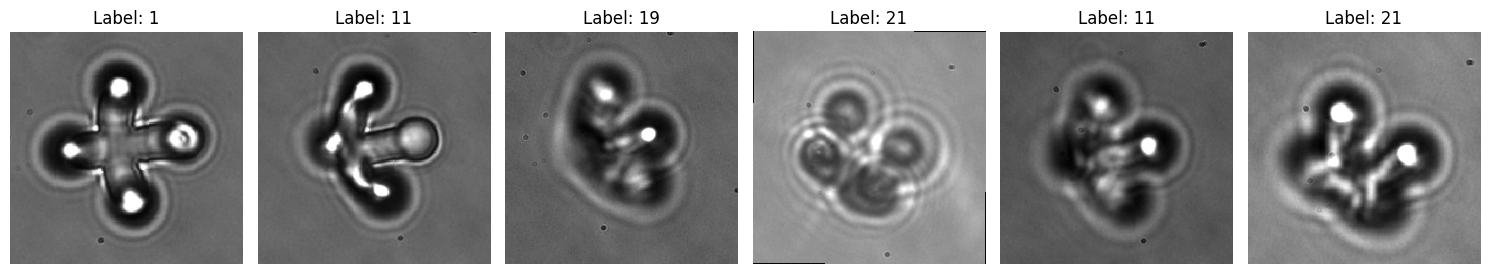

In [ ]:
# Function to show augmented images
def show_augmented_images(loader, num_images=6):
    # Get a batch of images and labels
    data_iter = iter(loader)
    images, labels = next(data_iter)

    # Plot images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        ax = axes[i]
        img = images[i].permute(1, 2, 0).numpy()  # Convert to HWC for Matplotlib
        ax.imshow(img.squeeze(), cmap='gray')    # Use 'gray' colormap for grayscale
        ax.axis("off")
        ax.set_title(f"Label: {labels[i]}")
    plt.tight_layout()
    plt.show()

# Show a few augmented images from the training loader
show_augmented_images(train_loader, num_images=6)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)  # Move model to the chosen device

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train_model(model, train_loader, val_loader, epochs=10):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        model.train()  # Set model to training mode
        running_loss, correct, total = 0.0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)  # Logits for combined classes
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Track accuracy
            _, predicted = torch.max(outputs, 1)  # Get predicted class
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item()

        # Calculate train loss and accuracy for the epoch
        train_loss = running_loss / len(train_loader)
        train_accuracy = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Validation phase
        model.eval()  # Set model to evaluation mode
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():  # Disable gradient computation for validation
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
                val_loss += loss.item()

        # Calculate validation loss and accuracy for the epoch
        val_loss = val_loss / len(val_loader)
        val_accuracy = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        # Print epoch results
        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    # Plotting the results
    epochs_range = range(1, epochs + 1)

    # Loss per epoch
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss', color='red')
    plt.plot(epochs_range, val_losses, label='Validation Loss', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch')
    plt.legend()

    # Accuracy per epoch
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Train Accuracy', color='green')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

Epoch [1/20], Train Loss: 3.5989, Train Accuracy: 0.0215, Validation Loss: 3.5848, Validation Accuracy: 0.0273
Epoch [2/20], Train Loss: 3.5761, Train Accuracy: 0.0430, Validation Loss: 3.4962, Validation Accuracy: 0.1166
Epoch [3/20], Train Loss: 3.1345, Train Accuracy: 0.1663, Validation Loss: 2.5970, Validation Accuracy: 0.2407
Epoch [4/20], Train Loss: 2.3415, Train Accuracy: 0.3284, Validation Loss: 1.7370, Validation Accuracy: 0.4913
Epoch [5/20], Train Loss: 1.6986, Train Accuracy: 0.4963, Validation Loss: 1.4789, Validation Accuracy: 0.5409
Epoch [6/20], Train Loss: 1.2192, Train Accuracy: 0.6419, Validation Loss: 1.0964, Validation Accuracy: 0.6625
Epoch [7/20], Train Loss: 0.8554, Train Accuracy: 0.7403, Validation Loss: 1.1332, Validation Accuracy: 0.6824
Epoch [8/20], Train Loss: 0.7024, Train Accuracy: 0.7601, Validation Loss: 0.9851, Validation Accuracy: 0.7022
Epoch [9/20], Train Loss: 0.5159, Train Accuracy: 0.8354, Validation Loss: 1.0208, Validation Accuracy: 0.7295
E

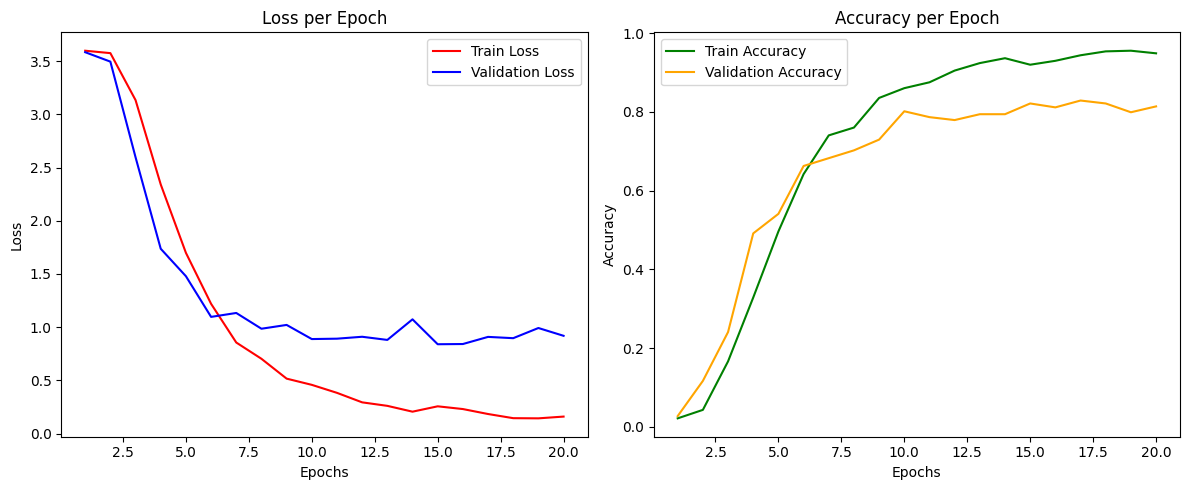

In [ ]:
train_model(model, train_loader, val_loader, epochs=20)

In [ ]:
# Testing and Evaluation Function with Confusion Matrix Display
def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode

    y_true = []
    y_pred = []

    with torch.no_grad():  # Disable gradient computation
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get predicted classes

            # Append true and predicted labels for evaluation
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Calculate accuracy
    accuracy = np.mean(np.array(y_true) == np.array(y_pred))
    print(f"Test Accuracy: {accuracy:.4f}")

    # Classification Report
    report = classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)], output_dict=True)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))

    # Calculate overall metrics (macro averaged)
    overall_precision = report["macro avg"]["precision"]
    overall_recall = report["macro avg"]["recall"]
    overall_f1 = report["macro avg"]["f1-score"]

    print(f"Overall Precision: {overall_precision:.4f}")
    print(f"Overall Recall: {overall_recall:.4f}")
    print(f"Overall F1-Score: {overall_f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the Confusion Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(num_classes)],
                yticklabels=[str(i) for i in range(num_classes)])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

Test Accuracy: 0.8540

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       1.00      0.73      0.84        11
           2       0.62      0.73      0.67        11
           3       1.00      0.82      0.90        11
           4       0.92      1.00      0.96        11
           5       0.90      0.82      0.86        11
           6       1.00      0.83      0.91        12
           7       0.82      0.75      0.78        12
           8       0.67      0.55      0.60        11
           9       0.70      0.64      0.67        11
          10       0.43      0.91      0.59        11
          11       1.00      0.36      0.53        11
          12       1.00      0.91      0.95        11
          13       0.90      0.82      0.86        11
          14       0.71      1.00      0.83        12
          15       0.85      1.00      0.92        11
          16       0.75      0.82  

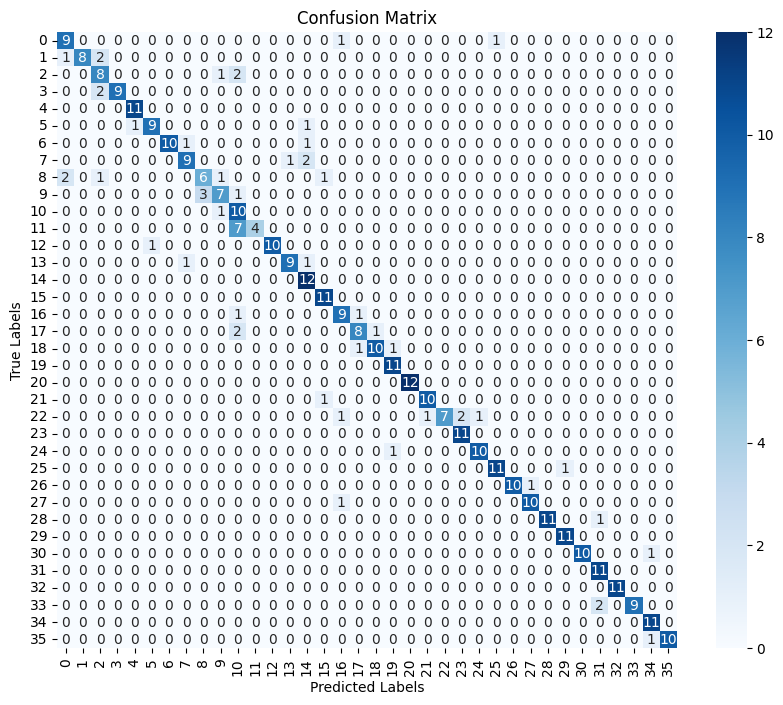

In [ ]:
evaluate_model(model, test_loader)

In [ ]:
# HYPERPARAMETER TUNING

from sklearn.model_selection import KFold

# Example dataset loader (replace with your own)
train_dataset = PoseDataset(train_df, transform=train_transform)
k_folds = 5  # Number of folds

# Define hyperparameters to tune
hyperparams = {
    'learning_rate': [0.001, 0.0001, 0.00001],
    'batch_size': [16, 32, 64]
}

# KFold split
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Function to train and evaluate
def train_and_evaluate(train_loader, val_loader, model, criterion, optimizer, epochs=5):
    for epoch in range(epochs):
        # Training phase
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Validation phase
        val_loss, val_correct, val_total = 0.0, 0, 0
        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                val_loss += criterion(outputs, labels).item()
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

    return val_loss / len(val_loader), val_correct / val_total

# Perform cross-validation
results = []

for lr in hyperparams['learning_rate']:
    for batch_size in hyperparams['batch_size']:
        print(f"Testing: Learning Rate={lr}, Batch Size={batch_size}")
        fold_results = []

        for fold, (train_idx, val_idx) in enumerate(kfold.split(train_dataset)):
            print(f"Fold {fold + 1}/{k_folds}")

            # Create data loaders
            train_subset = torch.utils.data.Subset(train_dataset, train_idx)
            val_subset = torch.utils.data.Subset(train_dataset, val_idx)
            train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True)
            val_loader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=False)

            # Initialize model
            model = CombinedClassCNN(num_classes=36).to(device)
            criterion = nn.CrossEntropyLoss()
            optimizer = torch.optim.Adam(model.parameters(), lr=lr)

            # Train and evaluate
            val_loss, val_acc = train_and_evaluate(train_loader, val_loader, model, criterion, optimizer, epochs=5)
            fold_results.append(val_acc)
            print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

        # Store average accuracy across folds
        avg_acc = np.mean(fold_results)
        results.append({'learning_rate': lr, 'batch_size': batch_size, 'accuracy': avg_acc})

# Print the results
best_result = max(results, key=lambda x: x['accuracy'])
print(f"Best Hyperparameters: {best_result}")


Testing: Learning Rate=0.001, Batch Size=16
Fold 1/5
Validation Loss: 1.5606, Validation Accuracy: 0.5124
Fold 2/5
Validation Loss: 3.5927, Validation Accuracy: 0.0248
Fold 3/5
Validation Loss: 3.6111, Validation Accuracy: 0.0041
Fold 4/5
Validation Loss: 1.8905, Validation Accuracy: 0.4298
Fold 5/5
Validation Loss: 3.5958, Validation Accuracy: 0.0207
Testing: Learning Rate=0.001, Batch Size=32
Fold 1/5
Validation Loss: 2.1178, Validation Accuracy: 0.3884
Fold 2/5
Validation Loss: 1.7661, Validation Accuracy: 0.4917
Fold 3/5
Validation Loss: 1.8896, Validation Accuracy: 0.4463
Fold 4/5
Validation Loss: 1.5782, Validation Accuracy: 0.5207
Fold 5/5
Validation Loss: 3.5969, Validation Accuracy: 0.0166
Testing: Learning Rate=0.001, Batch Size=64
Fold 1/5
Validation Loss: 3.4339, Validation Accuracy: 0.0868
Fold 2/5
Validation Loss: 2.6259, Validation Accuracy: 0.2934
Fold 3/5
Validation Loss: 2.8826, Validation Accuracy: 0.1777
Fold 4/5
Validation Loss: 2.6314, Validation Accuracy: 0.3017


In [ ]:
best_lr = best_result['learning_rate']
best_batch_size = best_result['batch_size']

In [ ]:
train_dataset = PoseDataset(train_df, transform=train_transform)
val_dataset = PoseDataset(val_df, transform=val_test_transform)
test_dataset = PoseDataset(test_df, transform=val_test_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=best_batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=best_batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=best_batch_size, shuffle=False)

In [ ]:
model = CombinedClassCNN(num_classes=36).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=best_lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
def train_with_best_hyperparams(model, train_loader, val_loader, test_loader, criterion, optimizer, scheduler, epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item()

        train_acc = correct / total
        train_loss = running_loss / len(train_loader)

        # Validation phase
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                val_loss += criterion(outputs, labels).item()
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_acc = val_correct / val_total
        val_loss /= len(val_loader)

        scheduler.step()

        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, "
              f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Test the model after training
    test_loss, test_correct, test_total = 0.0, 0, 0
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            test_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_acc = 100 * test_correct / test_total
    test_loss /= len(test_loader)

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

In [ ]:
train_with_best_hyperparams(
    model,
    train_loader,
    val_loader,
    test_loader,
    criterion,
    optimizer,
    scheduler,
    epochs=20
)

Epoch [1/20], Train Loss: 3.5951, Train Accuracy: 0.0256, Validation Loss: 3.5816, Validation Accuracy: 0.0273
Epoch [2/20], Train Loss: 3.5167, Train Accuracy: 0.0538, Validation Loss: 3.2403, Validation Accuracy: 0.1439
Epoch [3/20], Train Loss: 2.8393, Train Accuracy: 0.1861, Validation Loss: 2.4020, Validation Accuracy: 0.2854
Epoch [4/20], Train Loss: 1.9990, Train Accuracy: 0.4036, Validation Loss: 1.6749, Validation Accuracy: 0.5062
Epoch [5/20], Train Loss: 1.3574, Train Accuracy: 0.5707, Validation Loss: 1.2757, Validation Accuracy: 0.6005
Epoch [6/20], Train Loss: 0.9621, Train Accuracy: 0.7006, Validation Loss: 1.0957, Validation Accuracy: 0.6576
Epoch [7/20], Train Loss: 0.7825, Train Accuracy: 0.7552, Validation Loss: 1.0359, Validation Accuracy: 0.7072
Epoch [8/20], Train Loss: 0.6983, Train Accuracy: 0.7907, Validation Loss: 1.0145, Validation Accuracy: 0.6948
Epoch [9/20], Train Loss: 0.6301, Train Accuracy: 0.8040, Validation Loss: 0.9704, Validation Accuracy: 0.7122
E